In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from graph_nets import blocks
from graph_nets import graphs
from graph_nets import modules
from graph_nets import utils_np
from graph_nets import utils_tf

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sonnet as snt
import tensorflow as tf
from matplotlib.patches import Circle, Rectangle
import pickle
import graphtools as gt
from importlib import reload

import csv
%matplotlib notebook

In [89]:
# roadnodes = []
nodedict = {}
nodeidx = 0
with open("./hwy_pts.csv", newline='') as hwyfile:
    reader = csv.reader(hwyfile)
    next(reader, None)
    for l in reader:
        nodedict.update({nodeidx:{"coords":[float(l[0]),float(l[1])]}})
        # Initialize edge dict inside nodedict
        nodedict[nodeidx].update({"edgerefs":[]})
        nodeidx+=1
np_nodecoords = np.array([node["coords"] for node in nodedict.values()],dtype=np.float)
gt.generate_edges(nodedict,maxdist=4.0)
print(nodedict[0])

{'coords': [116.3894407, 39.9062721], 'edgerefs': [725, 1, 882, 1897, 881, 878, 2, 3]}


In [87]:
reload(gt)

<module 'graphtools' from '/home/michael/msc/summer17/traffic/traffic-stgcnn/graphtools.py'>

<IPython.core.display.Javascript object>


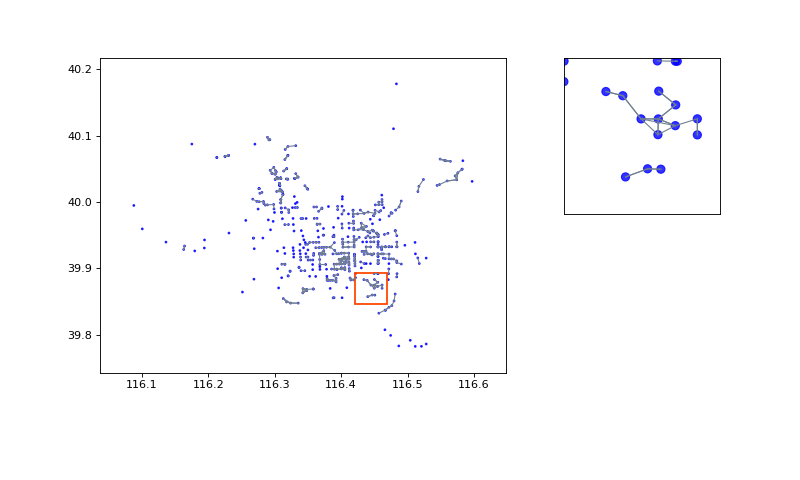

In [91]:
idxlist = np.arange(0,500)
vplot = gt.viewer(nodedict=nodedict,figsize=(10,6),idxlist=idxlist)
vplot.connect()

<IPython.core.display.Javascript object>


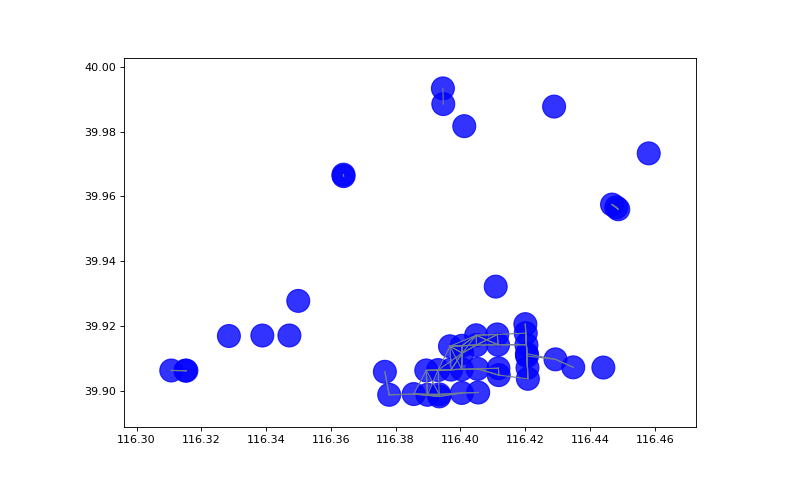

In [20]:
# figsize(width,height), (20,20) is good
gplot = gt.graphplot(nodedict,figsize=(10,6),idxlist=idxlist)
gplot.drawgraph()